My prediction task is to predict which machine will possibly fail before it actually fails


The output variable is the Machine status.( 1 – failure, 0 – normal) The output variable shows the model prediction 
of the Machine status given the specific set of input/features, which is the specifications of the machine.

In [205]:
#importing all the algorythm
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
#IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [169]:
# load datasets
df = pd.read_csv("data/factory_data.csv", header=0)
df

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,M,25.75,35.35,NaN,29.5,14,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19997,19998,T83921,M,25.95,NaN,NaN,33.4,22,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0


I visualised the size of the training data, as it is usually recommended to gather a good amount of data to get reliable predictions
and calculated the number of Features as well as the feature types.
Then I picked out a few models and tested their scores.
 
 

In [170]:
print(df.shape)
print(list(df.columns))

(20000, 9)
['Unique ID', 'Product ID', 'Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)', 'Torque (Nm)', 'Tool Wear (min)', 'Machine Status']


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


I then visualized the dataset to get a clearer idea on the dataset:
 - Countplot to show the count of Machine Status and Quality
 - Pie Chart for the the show the percentage of the columns
 - Boxplot to find any outliers of the numerical columns
 - Pairplot to indentify any correlations between features
 - Histogram to show to show frequency distributions of each feature

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


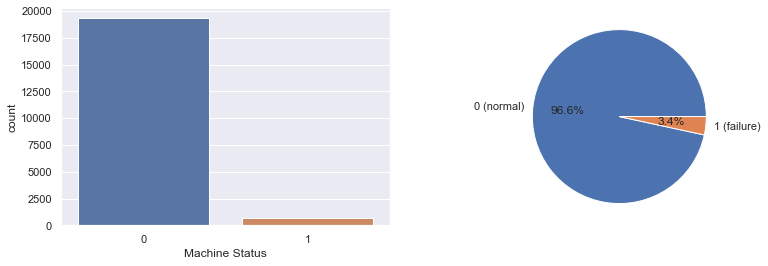

In [172]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
sns.countplot('Machine Status',data = df)
f.add_subplot(1,3,2)
b = df['Machine Status'].value_counts(normalize=True) * 100
my_labels = ['0 (normal)','1 (failure)']
plt.pie(b,labels=my_labels,autopct='%1.1f%%')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.patches.Wedge at 0x21aae391940>,
 [Text(-0.337255034755677, 1.0470238973070038, 'M'),
  Text(-0.006817135884838008, -1.0999788755509479, 'L'),
  Text(1.044913711259945, -0.3437373067052347, 'H')],
 [Text(-0.18395729168491468, 0.5711039439856384, '59.9%'),
  Text(-0.003718437755366185, -0.5999884775732442, '30.0%'),
  Text(0.5699529334145154, -0.18749307638467347, '10.1%')])

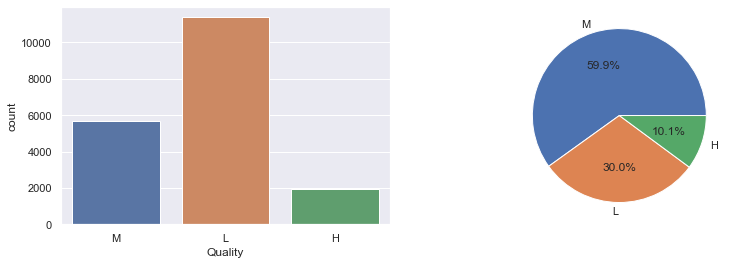

In [173]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
sns.countplot('Quality',data = df)
f.add_subplot(1,3,2)
b = df['Quality'].value_counts(normalize=True) * 100
my_labels = ['M','L', 'H']
plt.pie(b,labels=my_labels,autopct='%1.1f%%')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tool Wear (min)'>

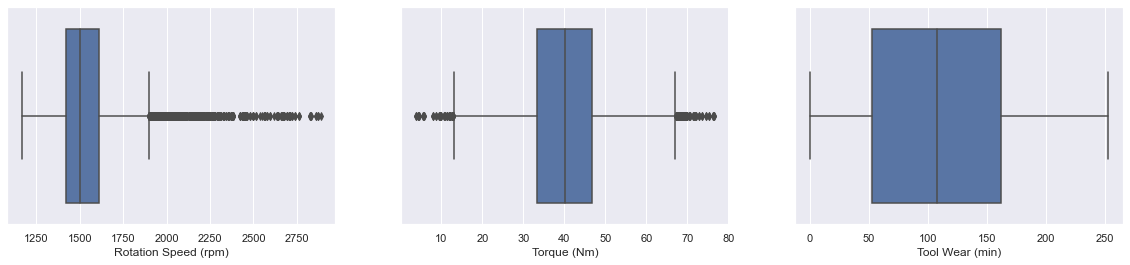

In [174]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
sns.boxplot(df['Rotation Speed (rpm)'])
f.add_subplot(1,3,2)
sns.boxplot(df['Torque (Nm)'])
f.add_subplot(1,3,3)
sns.boxplot(df['Tool Wear (min)'])

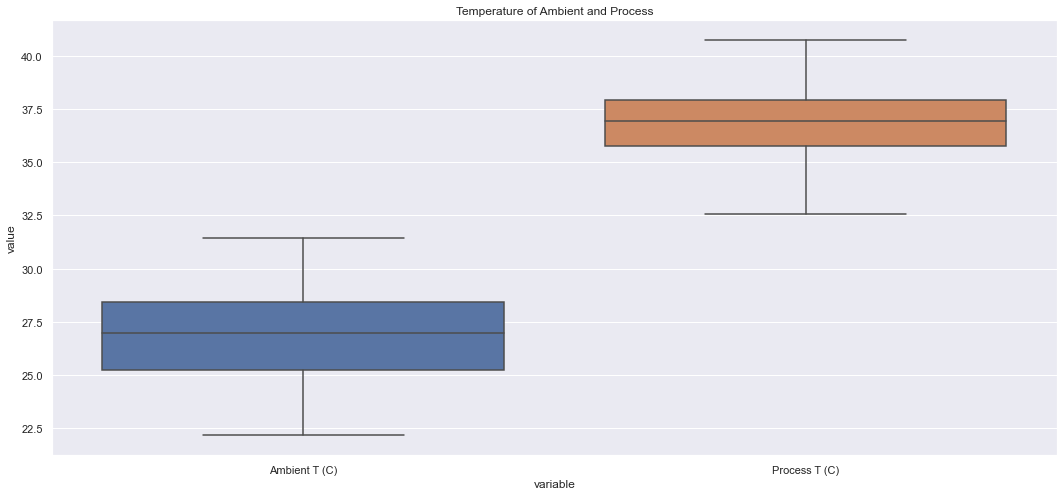

In [175]:
edited_df=df.drop(['Unique ID','Product ID','Quality','Machine Status','Rotation Speed (rpm)','Torque (Nm)','Tool Wear (min)'],axis=1)
plt.figure(1,figsize=(18,8))
sns.boxplot(x="variable", y="value", data=pd.melt(edited_df))
plt.title("Temperature of Ambient and Process")
plt.show()

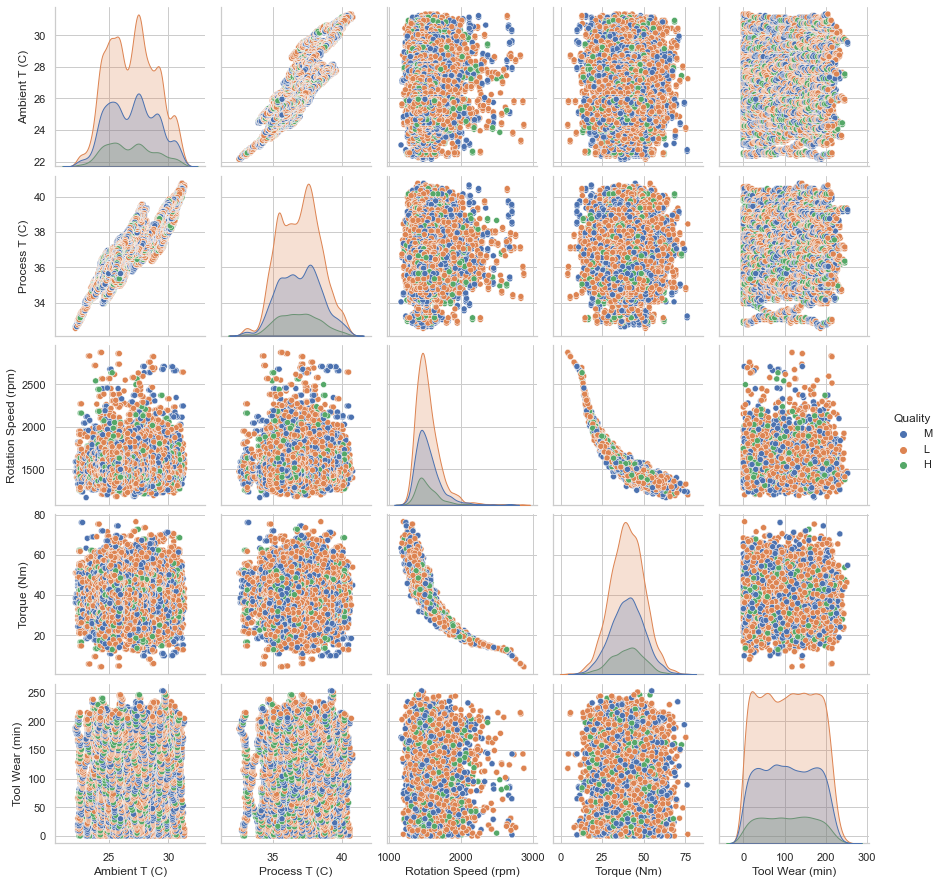

In [176]:
edited_df=df.drop(['Machine Status','Unique ID','Product ID'],axis=1)
sns.set_style("whitegrid")
sns.pairplot(edited_df,hue='Quality')
plt.show()

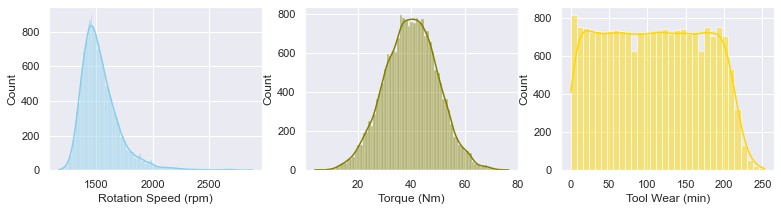

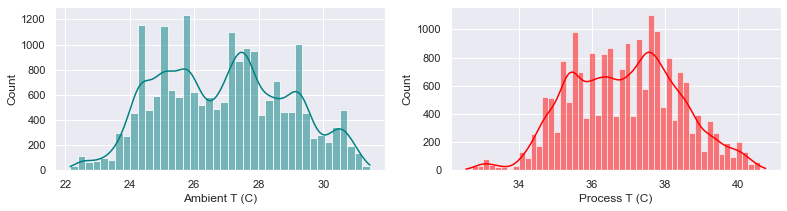

In [214]:
# background style 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(13, 3))

sns.histplot(data=df, x="Rotation Speed (rpm)", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Torque (Nm)", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="Tool Wear (min)", kde=True, color="gold", ax=axs[2])

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
sns.histplot(data=df, x="Ambient T (C)", kde=True, color="teal", ax=axs[0])
sns.histplot(data=df, x="Process T (C)", kde=True, color="red", ax=axs[1])

plt.show()

In [178]:
df.isnull().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

I imputed the null values of the data column 'Quality', which is a categorical feature with the mode using SimpleImputer

I imputed the null values of the data column 'Process T (C)' and 'Rotation Speed (rpm)', which are numerical featues using IterativeImputer.
IterativeImputer utilizes the data available in other features to estimate the missing values being imputed.

In [179]:
## Impute null values of Quality with the mode using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df[['Quality']])
quality_imputer = imputer.transform(df[['Quality']])
df[['Quality']] = quality_imputer
Qualdf=df[['Quality']]
Qualdf.isnull().sum()

Quality    0
dtype: int64

In [180]:
df= df.drop(['Unique ID','Product ID','Quality'],axis =1)
df.isnull().sum()

Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

In [181]:
# Impute null values of Process T (C) and Rotation Speed (rpm) using IterativeImputer
imp_mean = IterativeImputer(random_state=0)
data=imp_mean.fit_transform(df)
dat=pd.DataFrame(data,columns=df.columns)
dat.isnull().sum()

Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

In [182]:
data = pd.merge(Qualdf, dat, left_index=True, right_index=True)
data

,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,M,24.95,35.450000,1551.000000,42.8,0.0,0.0
1,L,25.05,35.550000,1408.000000,46.3,3.0,0.0
2,L,24.95,35.350000,1498.000000,49.4,5.0,0.0
3,L,25.05,35.450000,1433.000000,39.5,7.0,0.0
4,L,25.05,35.550000,1408.000000,40.0,9.0,0.0
...,...,...,...,...,...,...,...
19995,M,25.75,35.350000,1706.953243,29.5,14.0,0.0
19996,H,25.85,35.350000,1632.000000,31.8,17.0,0.0
19997,M,25.95,36.277561,1644.485521,33.4,22.0,0.0
19998,H,25.95,35.650000,1408.000000,48.5,25.0,0.0


In [183]:
data.isnull().sum()

Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

How do you represent your data as features?

I drop the useless columns 'Unique ID' and 'Product ID', convert the categorial data 'Quality' into numerical data by using LabelEncoder, which encodes the target labels with value between 0 and n_classes-1.Then I split them into X, which is my features and y, which is my target variable.

In [184]:
#LabelEncoder to convert categorial data
le = LabelEncoder()
data['Quality'] = le.fit_transform(data['Quality'])
data

,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,2,24.95,35.450000,1551.000000,42.8,0.0,0.0
1,1,25.05,35.550000,1408.000000,46.3,3.0,0.0
2,1,24.95,35.350000,1498.000000,49.4,5.0,0.0
3,1,25.05,35.450000,1433.000000,39.5,7.0,0.0
4,1,25.05,35.550000,1408.000000,40.0,9.0,0.0
...,...,...,...,...,...,...,...
19995,2,25.75,35.350000,1706.953243,29.5,14.0,0.0
19996,0,25.85,35.350000,1632.000000,31.8,17.0,0.0
19997,2,25.95,36.277561,1644.485521,33.4,22.0,0.0
19998,0,25.95,35.650000,1408.000000,48.5,25.0,0.0


In [185]:
X= data.drop(['Machine Status'],axis =1)
y= data['Machine Status']
print(X.shape)
print(y.shape)

(20000, 6)
(20000,)


In [186]:
data.columns

Index(['Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)',
       'Torque (Nm)', 'Tool Wear (min)', 'Machine Status'],
      dtype='object')

In [187]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state=42, stratify=y)

I then tested out 2 different types of scalers (StandardScaler and MinMaxScaler) and 
concluded to use Standard Scaler as the linear models' scores are affected more while the tree based models' scores are not really affected

StandardScaler 
- follows a normal-like distribution
    
MinMaxScaler 
- Works well on data that is NOT normally distributed (bell_shaped)
- Does not perform well with outliers

In [188]:
#Default parameters to get the Precision, Recall, Fscore, Accuracy before hyperparameter tuning
#Using StandardScaler
models = {'Knn': KNeighborsClassifier(),
          'GausNB': GaussianNB(),
          'LogReg' :LogisticRegression(),
          'DecTree': DecisionTreeClassifier(),
          'SVC': SVC(),
          'RForest': RandomForestClassifier()
         }
Array_Result = pd.DataFrame(columns=["Precision","Recall","Fscore","Accuracy"])

for i in models : 
    
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    (i, models[i])])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    precision,recall,fscore,support = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    result = pd.DataFrame({"Precision" : [precision], "Recall" : [recall], "Fscore" : [fscore], "Accuracy" : [accuracy]})
    
    Array_Result = Array_Result.append([result])
Array_Result.index=list(models.keys())
pd.DataFrame(Array_Result)

,Precision,Recall,Fscore,Accuracy
Knn,0.929082,0.756059,0.819192,0.98100
GausNB,0.649242,0.598854,0.618149,0.95825
LogReg,0.892032,0.609388,0.666192,0.97175
DecTree,0.934401,0.909694,0.921657,0.99000
SVC,0.968329,0.672535,0.748232,0.97725
RForest,0.986887,0.889447,0.932363,0.99200


In [189]:
#Default parameters to get the Precision, Recall, Fscore, Accuracy before hyperparameter tuning
#Using MinMaxScaler
models = {'Knn': KNeighborsClassifier(),
          'GausNB': GaussianNB(),
          'LogReg' :LogisticRegression(),
          'DecTree': DecisionTreeClassifier(),
          'SVC': SVC(),
          'RForest': RandomForestClassifier()
         }
Array_Result = pd.DataFrame(columns=["Precision","Recall","Fscore","Accuracy"])

for i in models : 
    
    pipe = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    (i, models[i])])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    precision,recall,fscore,support = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    result = pd.DataFrame({"Precision" : [precision], "Recall" : [recall], "Fscore" : [fscore], "Accuracy" : [accuracy]})
    
    Array_Result = Array_Result.append([result])
Array_Result.index=list(models.keys())
pd.DataFrame(Array_Result)

,Precision,Recall,Fscore,Accuracy
Knn,0.881056,0.732965,0.787795,0.97750
GausNB,0.649242,0.598854,0.618149,0.95825
LogReg,0.984211,0.536765,0.560472,0.96850
DecTree,0.923693,0.905630,0.914449,0.98900
SVC,0.970517,0.610165,0.672811,0.97325
RForest,0.987728,0.904153,0.941742,0.99300


Did you try to tune the hyperparameters of the learning algorithm, and in 
that case how?

I used the GridSearchCV function in the sklearn module, which carries out an exhaustive search over specified parameter values for an estimator.

For example, for my KNeighbors model, I used GridSearchCV to 
determine the best hyperparameters (weights, leaf_size, n_neighbors and p) which makes the model perform best with a list of parameters.

Another example, for my LogisticRegression model, I used GridSearchCV to 
determine the best hyperparameters (C, fit_intercept, tol and solver) which makes the model perform best with a list of parameters.

Fitting 5 folds for each of 2940 candidates, totalling 14700 fits
Knn:
Classification_Report:               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3864
         1.0       0.98      0.71      0.83       136

    accuracy                           0.99      4000
   macro avg       0.98      0.86      0.91      4000
weighted avg       0.99      0.99      0.99      4000

Confusion_Matrix: [[3862    2]
 [  39   97]]
Best Score: 0.9886874999999999
Best Parameters: {'Knn__leaf_size': 1, 'Knn__n_neighbors': 6, 'Knn__p': 1, 'Knn__weights': 'distance'}
ROC AUC Score: 0.9676900651564974
Fitting 5 folds for each of 50 candidates, totalling 250 fits
GausNB:
Classification_Report:               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3864
         1.0       0.81      0.10      0.17       136

    accuracy                           0.97      4000
   macro avg       0.89      0.55      0.58      4000
w

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC:
Classification_Report:               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3864
         1.0       0.88      0.74      0.80       136

    accuracy                           0.99      4000
   macro avg       0.93      0.87      0.90      4000
weighted avg       0.99      0.99      0.99      4000

Confusion_Matrix: [[3850   14]
 [  35  101]]
Best Score: 0.9868749999999998
Best Parameters: {'SVC__C': 10, 'SVC__gamma': 1, 'SVC__probability': True}
ROC AUC Score: 0.9685444830105956
Fitting 5 folds for each of 312 candidates, totalling 1560 fits
RForest:
Classification_Report:               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3864
         1.0       0.99      0.78      0.87       136

    accuracy                           0.99      4000
   macro avg       0.99      0.89      0.93      4000
weighted avg       0.99      0.99      0.99      4000

Confusion_Matrix: [[3863    1]
 [  30

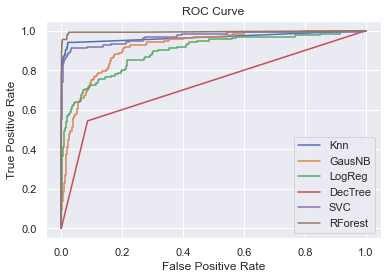

,roc_Score
Knn,0.967690
GausNB,0.916556
LogReg,0.895628
DecTree,0.728839
SVC,0.968544
RForest,0.994467


In [190]:
#hyperparameter tuning and get the ROC AUC Score
models = {'Knn': KNeighborsClassifier(),
          'GausNB': GaussianNB(),
          'LogReg' :LogisticRegression(),
          'DecTree': DecisionTreeClassifier(),
          'SVC': SVC(),
          'RForest': RandomForestClassifier()
         }

params={
    'Knn':{
        'Knn__weights': ['uniform', 'distance'],
        'Knn__leaf_size':list(range(1,50)),
        'Knn__n_neighbors': list(range(5,20)),
        'Knn__p':[1,2]
    },
    'GausNB':{
        'GausNB__var_smoothing': np.logspace(0,100)
    },
    'LogReg':{
        'LogReg__C' : list(np.arange(1000,2000,200)),
        'LogReg__fit_intercept' : [True, False],
        'LogReg__tol' : [1e-5,1e-4],
        'LogReg__solver' : ['newton-cg','lbfgs']
    },
    'DecTree':{
        'DecTree__criterion':['gini','entropy'],
        'DecTree__max_depth':np.linspace(1, 32, 32, endpoint=True),
        'DecTree__min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
        'DecTree__min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)
    },
    'SVC':{
        'SVC__C': [0.1,1, 10], 
        'SVC__gamma': [1,0.1,0.01],
        'SVC__probability':[True]
    },
    'RForest':{
        'RForest__criterion':['gini','entropy'],
        'RForest__n_estimators':np.arange(40,300,10),
        'RForest__max_depth':np.arange(1,60,10)
    }
}

roc_Score=[]

for i in models:
    pipe=Pipeline([('StandardScalar', StandardScaler()),(i,models[i])])
    pipe = GridSearchCV(pipe, params[i],cv=5,n_jobs=-1, verbose=2)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"{i}:")
    print(f"Classification_Report: {classification_report(y_test, y_pred)}")
    print(f"Confusion_Matrix: {confusion_matrix(y_test, y_pred)}")
    #Find best scores for KNN
    print(f"Best Score: {pipe.best_score_}")
    print(f"Best Parameters: {pipe.best_params_}")
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = pipe.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    #Print AUC Score
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")
    roc_Score.append(roc_auc_score(y_test, y_pred_prob))

    # Plot ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
roc= pd.DataFrame(columns=['roc_Score'])
roc['roc_Score']=roc_Score
roc.index=list(models.keys())
plt.legend(models.keys())
plt.show()
pd.DataFrame(roc)
          

The ROC plot above shows that the Randomforest provided the best performance as it occupies the curve at the far left and top, so the Area Under the curve is close to zero.


From the confusion matrix above:

     -KNeighborsClassifier has 39 type 1 error and 2 type 2 error
     -GaussianNB has 123 type 1 error and 3 type 2 error
     -LogisticRegression has 105 type 1 error and 7 type 2 error
     -DecisionTreeClassifier has 136 type 1 error and 0 type 2 error
     -SVC has 35 type 1 error and 14 type 2 error
     -RandomForestClassifier has 28 type 1 error and 2 type 2 error
False Positive (Type 1 Error) : Machine learning model predicted machine status 1 but in reality machine status 0.
False Negative (Type 2 Error) : Machine learning model predicted machine status 0 but in reality the machine status 1.

In [213]:
#Put in parameters to get the Precision, Recall, Fscore, Accuracy after hyperparameter tuning
models = {'Knn': KNeighborsClassifier(leaf_size= 1,
                                       n_neighbors= 6,
                                       p= 1,
                                       weights= 'distance'),
          'GausNB': GaussianNB(var_smoothing= 1.0),
          'LogReg' :LogisticRegression(C= 1000,
                                        fit_intercept= True,
                                        solver= 'newton-cg',
                                        tol= 1e-05),
          'DecTree': DecisionTreeClassifier(criterion= 'gini', 
                                            max_depth= 1.0, 
                                            min_samples_leaf= 0.1, 
                                            min_samples_split= 0.1),
          'SVC': SVC(C= 10,
                     gamma= 1,),
          'RForest': RandomForestClassifier(criterion= 'entropy', 
                                  max_depth= 31, 
                                  n_estimators= 270),
          'Dummy':DummyClassifier(strategy="most_frequent")
         }

Array_Result = pd.DataFrame([], columns=["Precision","Recall","Fscore","Accuracy"])

for i in models :
    steps=[('scaler', StandardScaler()),
    (i, models[i])]
    
    pipe = Pipeline(steps)
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    cv_Train=np.mean(cross_val_score(pipe, X_train, y_train, cv=10, n_jobs=-1))
    cv_Test=np.mean(cross_val_score(pipe, X_test, y_test, cv=10, n_jobs=-1))
    print(f"Training Data: {i} score: {cv_Train}")
    print(f"Testing Data: {i} score: {cv_Test}")
    
    precision,recall,fscore,support = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    result = pd.DataFrame({"Precision" : [precision], "Recall" : recall, "Fscore" : [fscore], "Accuracy" : [accuracy]})
    
    Array_Result = Array_Result.append([result])

Array_Result.index=list(models.keys())
pd.DataFrame(Array_Result)

Training Data: Knn score: 0.9900624999999998
Testing Data: Knn score: 0.97475
Training Data: GausNB score: 0.9675625
Testing Data: GausNB score: 0.968
Training Data: LogReg score: 0.96975
Testing Data: LogReg score: 0.9730000000000001
Training Data: DecTree score: 0.9661249999999999
Testing Data: DecTree score: 0.966


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Data: SVC score: 0.9876250000000001
Testing Data: SVC score: 0.9730000000000001
Training Data: RForest score: 0.9926875
Testing Data: RForest score: 0.9782500000000001
Training Data: Dummy score: 0.9661249999999999
Testing Data: Dummy score: 0.966


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Precision,Recall,Fscore,Accuracy
Knn,0.984900,0.856359,0.910126,0.98975
GausNB,0.890813,0.547406,0.577499,0.96850
LogReg,0.894644,0.613065,0.671005,0.97200
DecTree,0.483000,0.500000,0.491353,0.96600
SVC,0.934626,0.869512,0.899229,0.98775
RForest,0.991815,0.896929,0.938947,0.99275
Dummy,0.483000,0.500000,0.491353,0.96600


Here all the other models have a higher Precision, Recall, Fscore and Accuracy score than dummy, which is used as a stupid baseline and makes predictions that ignore the input features, so my sytem works a lot better than the baseline. 
The Dummy classifier serves as a simple baseline to compare against other more complex classifiers.

# Evaluation

All the models have a much higher True Positive number than False Positive number as shown by their confusion matrix.

I now then compute the training and testing scores to decide whether the data is Overfitting or underfitting or appropriatelyfitted.
As seen above the scores of the training and testing data for each model are relatively similar so the data is appropriately fitted.

The features used by the model reflects as the returned scores, so it is a must to make sure that the important feature does not have other
variables affecting it to perform better, such as outliers and null values.

# Conclusion:

My RandomForest model is the best model out of all the other models with high Precision, Recall, Fscore, Accuracy scores,
has a higher True Positive Number than False Positive Number , high Area Under Curve, the lowest Type 1 error.